In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt


## GD for large learning rates


In [11]:
# initialize x as a Torch tensor
x = torch.tensor(0.5, requires_grad=True, dtype=torch.float64)
y = x ** 4


n_iter = 1000
lr = torch.tensor(1.999999999999999, dtype=torch.float64)

# buffer for results
x_buf = np.zeros(n_iter)
x_buf[0] = x

# define optimizer
optimizer = torch.optim.SGD([x], lr=lr)

for i in range(1, n_iter):
    # zero out the gradient (by default PyTorch accumulates gradients)
    optimizer.zero_grad()
    y = x ** 4
    # compute the gradient
    y.backward(retain_graph=True)
    # apply GD step
    optimizer.step()
    # store the result
    x_buf[i] = x


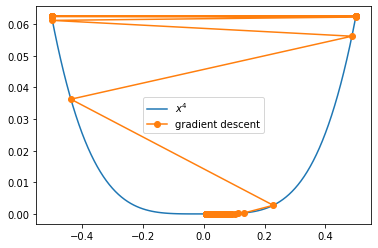

In [12]:
# plot results
x = np.arange(-0.5, 0.51, 0.01)
plt.plot(x, x ** 4, label="$x^4$")
plt.plot(x_buf, x_buf ** 4, "-o", label="gradient descent")
plt.legend(loc=10)
plt.show()


## GD for small learning rates


In [13]:
x = torch.tensor(0.5, requires_grad=True)

# change lr to 0.5
n_iter = 1000
lr = 0.5

x_buf = np.zeros(n_iter)
x_buf[0] = x

optimizer = torch.optim.SGD([x], lr=lr)

for i in range(1, n_iter):
    optimizer.zero_grad()
    y = x ** 4
    y.backward(retain_graph=True)
    optimizer.step()
    x_buf[i] = x


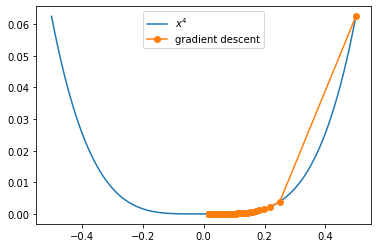

In [14]:
# plot results
x = np.arange(-0.5, 0.51, 0.01)
plt.plot(x, x ** 4, label="$x^4$")
plt.plot(x_buf, x_buf ** 4, "-o", label="gradient descent")
plt.legend()
plt.show()


## Momentum


In [15]:
x = torch.tensor(0.5, requires_grad=True)

# momentum coefficient
n_iter = 1000
lr = 2
mom = 0.5

x_buf = np.zeros(n_iter)
x_buf[0] = x

# add momentum to the optimizer
optimizer = torch.optim.SGD([x], lr=lr, momentum=mom)

for i in range(1, n_iter):
    optimizer.zero_grad()
    y = x ** 4
    y.backward(retain_graph=True)
    optimizer.step()
    x_buf[i] = x


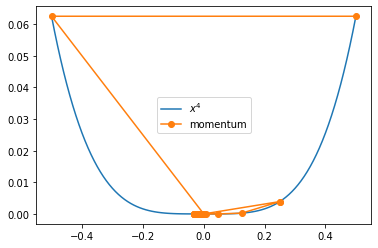

In [17]:
# plot results
x = np.arange(-0.5, 0.51, 0.01)
plt.plot(x, x ** 4, label="$x^4$")
plt.plot(x_buf, x_buf ** 4, "-o", label="momentum")
plt.legend()
plt.show()
